### <font color='green'>Johnny Yu</font>
### <font color='green'>https://github.com/johnnyUCSF/hw2-skeleton</font>

## <font color='Blue'>Part 1.</font>

### My similarity metric function has two steps. First, it reduces the information for each active site. For each residue I classify it into a category based on whether the residue is nonpolar, amphipathic, polar, or charged. I then take the two  simplified strings of residues and align the active sites in a pairwise fashion using a global alignment method which assigns + points for a correctly aligned base pair, and penalizes gaps and extensions in gaps. After obtaining an alignment score I then calculated the maximum alignment possible alignment score for the two sequences, and divided the actual/max to get a percent alignment score. I then converted the active site objects into a string based on straight amino acid dictionaries, and then did alignment with these two strings as well. I then averaged the alignment score calculated for the simplified strings and the alignment score calculated for unsimplified strings.
### I devised this scoring system based on the assumptions that 1) biologically amino acids can often be interchangable based on shared function and 2) active sites with similar sequences have similar function. The first assumption although it does not hold in every case, allows for a greater degree of "wiggle" room between alignments and is built into the first step. For example, valine and isoleucine are both nonpolar amino acids and often are interchangable functionally. By removing the distinction between them and categorizing them both as "n" for "nonpolar", I still retain the information of their functional assignments, but prevent the downstream sequence alignment algorithm from marking them as mismatches. The second assumption is that similar sequences -> similar functions, which is a pattern that has been validated fairly broadly in biology, so I believe that is a fair assumption as well. In summary then, my function seeks to quantify the degree of similarity measured between two active sites using: 1) a simplification of amino acids to functional class, to allow for mismatch tolerance between sequences based on functional identity and 2) a global pairwise alignment algorithm based on these simplified strings, and normalization by max possible score.



In [1]:
from hw2skeleton import cluster
from hw2skeleton import io
%matplotlib inline
####import data
active_sites = io.read_active_sites('/Users/johnny/Desktop/class/hw2-skeleton/data')
####calculate distance
Dists = cluster.calc_distmatrix(active_sites)
####format into one list
All_Dists = []
for row in range(len(Dists)):
    for col in range(len(Dists)):
        if col > row: 
            All_Dists.append(Dists[row][col])
            

Read in 136 active sites


Similarity scores seem to fall within decently normal range centered around 0.4


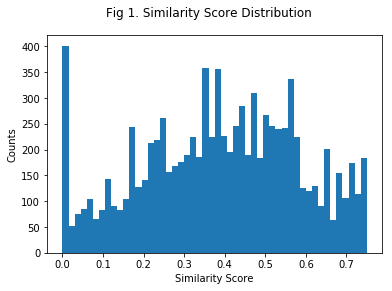

In [23]:
cluster.plt.hist(All_Dists, bins = 50)
cluster.plt.suptitle('Fig 1. Similarity Score Distribution')
cluster.plt.xlabel('Similarity Score')
cluster.plt.ylabel('Counts')
print('Similarity scores seem to fall within decently normal range centered around 0.4')


## <font color='Blue'>Part 2.</font>

### The partitioning algorithm I implemented is K-means. I chose to use this because K-means is more computationally efficient than some other methods, easy to implement, makes sense for our biological problem, and works well with large datasets. K-means uses centroids in the data, which works well with active site data. If we were instead to implement a medoid, average, or some other cluster center that is not actually an active site point we would have to somehow combine features of the active sites in that cluster. However, using an actual active site as the centroid simplifies that problem. K-means by centroids also makes sense biologically, assuming we have a large enough set of active sites, because if we were to estimate a novel cluster center based on the properties of the active sites in the cluster, we would essentially be creating a new 'meta-active site'. However, in the process of calculating this we might generate something that is very dissimilar from biology. By using the active site that has the greatest similarity to all the others in the cluster, we select the most representative active site in a class, and avoid the problem of potentially creating a fictional, non-biologically relevant active site. 

## <font color='Blue'>Part 3.</font>

### The hierarchical algorithm I chose to implement was single-linkage clustering (k-nearest neighbors). I chose this based on its ease of implementation, faster than divisive clustering, and applicability to our biological data set (active sites). While divisive clustering is O(2^n), single-linkage can be O(n^3) or O(n^2). Additionally, in comparison to a k-nearest neighbor implementation, the tree need only be calculated once and the clusters at each K = desired numbers of clusters can be inferred afterwards without further calculation. 
### The use of knn also made sense to me based on the problem at hand. Our dataset are active sites of proteins that have diverged throughout evolution. Whereas a divisive algorithm assumes that everything is in one cluster to start and breaks it up, using 'cluster similarity' as the metric, our Knn algorithm assumes that two proteins might be related and builds up from there. This method might catch proteins that are highly similar and build out cluster centers from there, allowing common themes in active sites to serve as the centroids around which to build clusters. Based on what we know about protein domains and active sites, there are reoccuring patterns (motifs) shared between proteins; by allowing Knn to nucleate clusters based around these shared motifs, we can apply our biological intution to the algorithm. 




## <font color='Blue'>Part 4.</font>

### The quality metric I used to compare clusterings was total intra-cluster distance normalized by the amount of members in the cluster squared. Finding the intra-cluster distance makes sense because a good cluster should have members that lie close together, and a bad cluster should have members that are far apart because they are not actually members in one cluster. I then chose to normalize the total intracluster distance by the number of members squared in a cluster because having more members in a cluster will automatically add more distance to the overall intracluster distance. I also checked to see if the relationship between total distance and number of members was linear. 
(See Below)

#### <font color='purple'>In this cell I am creating a set of random numbers within a fixed range. I then measure the distance between them and sum the total intracluster distance. My goal is to find a relationship between intracluster distance and N (number of cluster members). By finding a relationship I know what to normalize the intracluster distance by.</font>

In [3]:
import random
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
################################
num_iterations = 20
min_items = 5
max_items = 50
#####
Items = []
x = []
x2 = []
for num_items in range(min_items,max_items):
    Dists = []
    for iterations in range(num_iterations):
        initial_set = random.sample(range(20, 80),num_items)
        # add_one = random.sample(range(1, 100),5)
        total_dist = 0
        for item1 in initial_set:
            for item2 in initial_set:
                total_dist += abs(item2-item1)
        Dists.append(total_dist)
    ###find median distance
    Items.append((numpy.median(Dists)))
    x.append(num_items)
    x2.append(num_items**2)

#### <font color='purple'>Here you can see that intracluster distance increases faster than N.</font>

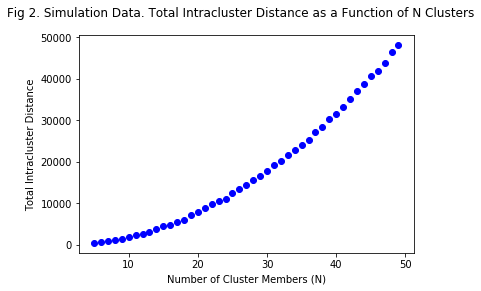

This simulation data shows that as you increase the number of clusters the total intracluster distance increase faster.


In [25]:
#####plot linear
plt.plot(x, Items, 'bo')
plt.suptitle('Fig 2. Simulation Data. Total Intracluster Distance as a Function of N Clusters')
plt.ylabel('Total Intracluster Distance')
plt.xlabel('Number of Cluster Members (N)')
plt.show()
print('This simulation data shows that as you increase the number of clusters the total intracluster distance increase faster.')

#### <font color='purple'>Here you can see that intracluster distance is linear with N^2. This suggests that it is appropriate to normalize intracluster distance by N^2.</font>

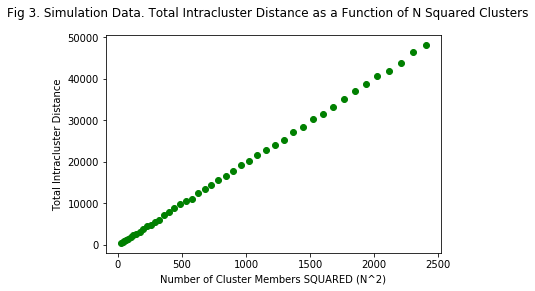

This simulation data shows that total intracluster distance varies with N^2 this would be appropriate to normalize against.


In [26]:
#####plot x^2
plt.plot(x2, Items, 'go')
plt.suptitle('Fig 3. Simulation Data. Total Intracluster Distance as a Function of N Squared Clusters')
plt.ylabel('Total Intracluster Distance')
plt.xlabel('Number of Cluster Members SQUARED (N^2)')
plt.show()
print('This simulation data shows that total intracluster distance varies with N^2 this would be appropriate to normalize against.')





#### <font color='purple'>Clearly the relationship between total cluster distance and number of members in a cluster is quadratic, which makes sense given that for each point added we are summing the distance between that point and all other points. Therefore, I normalized the quality score by N^2 where N = number of members of a cluster. </font>
#### <font color='purple'>I then proceeded to test each of my clustering methods and assay the quality of the clusterings. I first tested my partitioning algorithm:(below)</font>



In [6]:
from hw2skeleton import cluster
from hw2skeleton import io
%matplotlib inline
####import data
active_sites = io.read_active_sites('/Users/johnny/Desktop/class/hw2-skeleton/data')


Read in 136 active sites


In [ ]:
####partitioning evaluation
max_clust = 7
part_quality_scores = []
x_axis_part = []
for k in range(1,max_clust+1):
    print(k)
    output = cluster.cluster_by_partitioning(active_sites,k)
    print('calcing quality...')
    quality = cluster.calc_clust_dist(output)
    part_quality_scores.append(quality)
    x_axis_part.append(k)

#### <font color='purple'>To visualize the quality of the clusterings I used boxplots to show the distribution of quality scores within each clustering. The ideal cluster should have a small intracluster distance (as close to 0 as possible) as well as a tight distribution. An average score close to 0 indicates that the average intracluster distance is small indicating good clusters. However, the variance around the mean also indicates the relative spread across clusters. You would not want one cluster to have a very good cluster score, while other clusters have very poor cluster scores. Ideally, you would want all the clusters to have similar cluster scores so they are equally good. 



See the plot below for clustering ratings of the hierarchical algorithm.</font>



Clusterings for K-means Partitioning Algorithm.


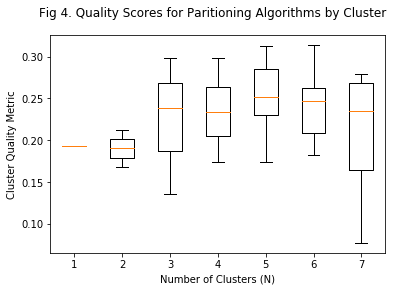

In [33]:
cluster.plt.boxplot(part_quality_scores,positions=x_axis_part)
plt.suptitle('Fig 4. Quality Scores for Paritioning Algorithms by Cluster')
plt.ylabel('Cluster Quality Metric')
plt.xlabel('Number of Clusters (N)')
print('Clusterings for K-means Partitioning Algorithm.')


#### <font color='purple'>Based on the clustering here, it appears that the best number of clusters for hierarchical clustering is 1 or 2 for our PARTITIONING algorithm.</font>

#### <font color='purple'>Now I will evaluate the HIERARCHICAL algorithm. </font>

In [9]:
####hierarchical evaluation
output = cluster.cluster_hierarchically(active_sites)

In [10]:
x_axis = []
hier_quality_scores = []
for clust in output:
    quality = cluster.calc_clust_dist(clust)
    hier_quality_scores.append(quality)
    x_axis.append(len(clust))
####format
x_axis.reverse()
hier_quality_scores.reverse()

All Hierarchical Cluster Quality Scores


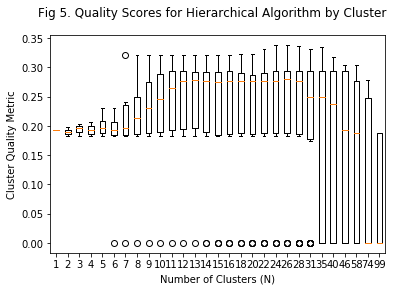

In [34]:
####plot
cluster.plt.boxplot(hier_quality_scores,labels=x_axis)
plt.suptitle('Fig 5. Quality Scores for Hierarchical Algorithm by Cluster')
plt.ylabel('Cluster Quality Metric')
plt.xlabel('Number of Clusters (N)')
print('All Hierarchical Cluster Quality Scores')

Hierarchical Clustering, clusters 1-7. Broken up from Figure 5 to allow for better visualization.


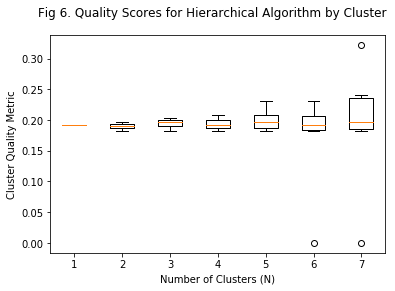

In [51]:
#####subset plotting 
tmp_x = x_axis[0:7]
tmp_scores = hier_quality_scores[0:7]
####plot
cluster.plt.boxplot(tmp_scores,labels=tmp_x)
plt.suptitle('Fig 6. Quality Scores for Hierarchical Algorithm by Cluster')
plt.ylabel('Cluster Quality Metric')
plt.xlabel('Number of Clusters (N)')
print('Hierarchical Clustering, clusters 1-7. Broken up from Figure 5 to allow for better visualization.')

#### <font color='purple'>Based on the clustering here, it appears that the best number of clusters for hierarchical clustering would be 2, 3, or 4 </font>

Hierarchical Clustering, clusters 8-15. Broken up from Figure 5 to allow for better visualization.


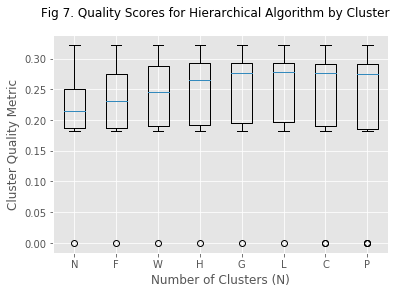

In [173]:
#####subset plotting 
tmp_x = x_axis[7:15]
tmp_scores = hier_quality_scores[7:15]
####plot
cluster.plt.boxplot(tmp_scores,labels=tmp_x)
plt.suptitle('Fig 7. Quality Scores for Hierarchical Algorithm by Cluster')
plt.ylabel('Cluster Quality Metric')
plt.xlabel('Number of Clusters (N)')
print('Hierarchical Clustering, clusters 8-15. Broken up from Figure 5 to allow for better visualization.')

Hierarchical Clustering, clusters 16-end


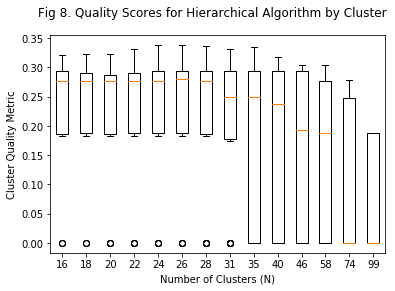

In [40]:
#####subset plotting 
tmp_x = x_axis[15:]
tmp_scores = hier_quality_scores[15:]
####plot
cluster.plt.boxplot(tmp_scores,labels=tmp_x)
plt.suptitle('Fig 8. Quality Scores for Hierarchical Algorithm by Cluster')
plt.ylabel('Cluster Quality Metric')
plt.xlabel('Number of Clusters (N)')
print('Hierarchical Clustering, clusters 16-end')

## <font color='Blue'>Part 5.</font>

### My method of comparing between clusterings performed with partitioning vs hierarchical algorithms is based on comparing the quality metrics for each cluster. I take the quality scores computed for each clustering and put it into one list. Because we want the clustering scores to be both close to zero as well as close to each other, we will need to look at the plots of these values to make a qualitative determination about which one is better:

Partitioning Algorithm has a much tighter range of quality scores.


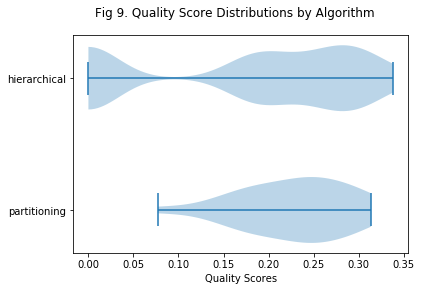

In [42]:
comparison = cluster.compare_clusterings(part_quality_scores,hier_quality_scores)
plt.suptitle('Fig 9. Quality Score Distributions by Algorithm')
plt.xlabel('Quality Scores')
print('Partitioning Algorithm has a much tighter range of quality scores.')


### <font color='darkgreen'>It appears that the distribution of cluster qualities is similar between these two methods. However, many of the hierarchical clusters appear to have very low or zero values of distance, which indicates that this may produce clusters with very few or single members in a cluster. Furthermore, the distribution of cluster values in the partitioning algorithm is much closer to each other than the values in the hierarchical algorithm. Therefore, we can safely conclude that the partitioning algorithm produces clusters that are more similar to each other than the hierarchical one, which produces clusters that have a greater variance in their cluster qualities. A a result, I would select the partitioining algorithm to use for this dataset. Furthermore, the quality scores of the hierarchical clustering are almost always consistently higher. </font>

Clusterings for K-means Partitioning Algorithm. Replotted from above.


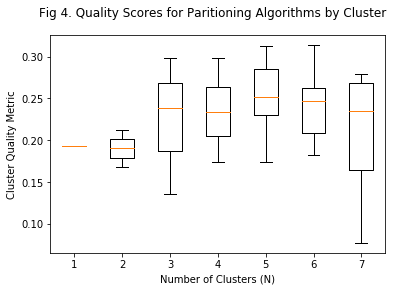

In [50]:
cluster.plt.boxplot(part_quality_scores,positions=x_axis_part)
plt.suptitle('Fig 4. Quality Scores for Paritioning Algorithms by Cluster')
plt.ylabel('Cluster Quality Metric')
plt.xlabel('Number of Clusters (N)')
print('Clusterings for K-means Partitioning Algorithm. Replotted from above.')


Hierarchical Clustering, clusters 1-7. Replotted from above.


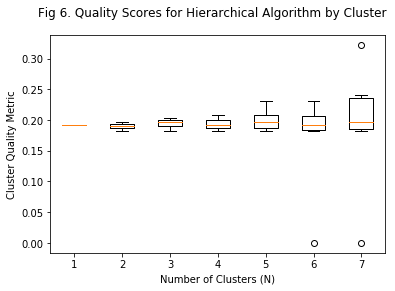

In [49]:
#####subset plotting 
tmp_x = x_axis[0:7]
tmp_scores = hier_quality_scores[0:7]
####plot
cluster.plt.boxplot(tmp_scores,labels=tmp_x)
plt.suptitle('Fig 6. Quality Scores for Hierarchical Algorithm by Cluster')
plt.ylabel('Cluster Quality Metric')
plt.xlabel('Number of Clusters (N)')
print('Hierarchical Clustering, clusters 1-7. Replotted from above.')

## <font color='Blue'>Part 6.</font>

### To investigate the question of whether or not the clusters have any biological meaning I looked into the clusters individually. Here are the results from the N = 2 clustering using the K-means partitioning algorithm:

In [64]:
from hw2skeleton import cluster
from hw2skeleton import io

In [ ]:
kmeans_2 = cluster.cluster_by_partitioning(active_sites,2)

In [163]:
#####count # of each class and each amino acid 

###
classes = []
aminoacids = []
for clust in kmeans_2:
    tmp_classes = ''
    tmp_aminoacids = ''
    for site in clust:
        tmp_classes += (cluster.calc_seq(site))
        tmp_aminoacids += (cluster.simplify_seq(site))
    classes.append(tmp_classes)
    aminoacids.append(tmp_aminoacids)
###


In [123]:
from collections import Counter
####
counts_all = []
len1 = len(classes[0])
len2 = len(classes[1])
for string in classes:
    counts=Counter(string) # Counter({'l': 2, 'H': 1, 'e': 1, 'o': 1})
    counts_all.append(counts)

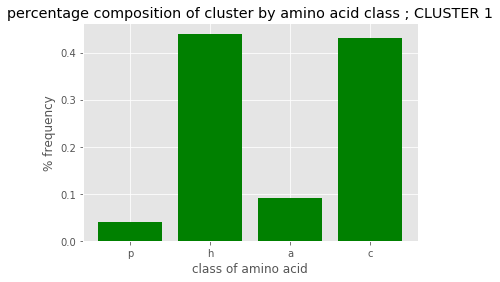

In [159]:
x_axis = []
y_axis = []
for key in counts_all[0]:
    x_axis.append(key)
    y_axis.append(float(counts_all[0][key])/float(len1))
####plot
plt.style.use('ggplot')
##
x_pos = [i for i, _ in enumerate(x_axis)]
##
plt.bar(x_pos, y_axis, color='green')
plt.xlabel("class of amino acid")
plt.ylabel("% frequency")
plt.title("percentage composition of cluster by amino acid class ; CLUSTER 1")
plt.xticks(x_pos, x_axis)
##
plt.show()

#### This is the relative percentage of each class of amino acid in CLUSTER 1.
#### p = polar, h = hydrophobic, a = amphipathic, c = charged

### <font color='purple'>It appears that most of the amino acids are HYDROPHOBIC or CHARGED in CLUSTER 1</font>



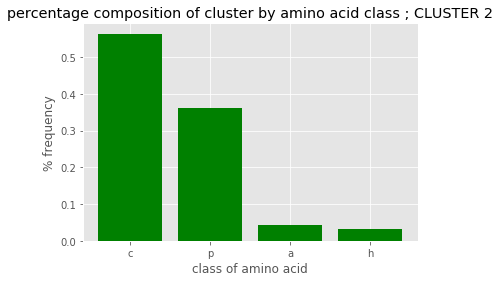

In [160]:
x_axis = []
y_axis = []
for key in counts_all[1]:
    x_axis.append(key)
    y_axis.append(float(counts_all[1][key])/float(len2))
####plot
plt.style.use('ggplot')
##
x_pos = [i for i, _ in enumerate(x_axis)]
##
plt.bar(x_pos, y_axis, color='green')
plt.xlabel("class of amino acid")
plt.ylabel("% frequency")
plt.title("percentage composition of cluster by amino acid class ; CLUSTER 2")
plt.xticks(x_pos, x_axis)
##
plt.show()

#### This is the relative percentage of each class of amino acid in CLUSTER 2.
#### p = polar, h = hydrophobic, a = amphipathic, c = charged

### <font color='purple'>It appears that most of the amino acids are POLAR or CHARGED in CLUSTER 2</font>

## Now I will look at amino acid frequencies in this cluster

In [165]:
from collections import Counter
####
counts_all = []
len1 = len(aminoacids[0])
len2 = len(aminoacids[1])
for string in aminoacids:
    counts=Counter(string) # Counter({'l': 2, 'H': 1, 'e': 1, 'o': 1})
    counts_all.append(counts)

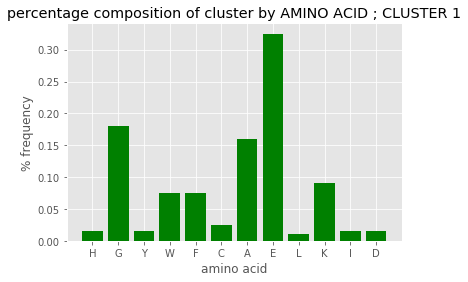

In [168]:
x_axis = []
y_axis = []
for key in counts_all[0]:
    x_axis.append(key)
    y_axis.append(float(counts_all[0][key])/float(len1))
####plot
plt.style.use('ggplot')
##
x_pos = [i for i, _ in enumerate(x_axis)]
##
plt.bar(x_pos, y_axis, color='green')
plt.xlabel("amino acid")
plt.ylabel("% frequency")
plt.title("percentage composition of cluster by AMINO ACID ; CLUSTER 1")
plt.xticks(x_pos, x_axis)
##
plt.show()

#### This is the relative percentage of each amino acid in CLUSTER 1.

### <font color='purple'>It appears that most frequent amino acids are Glutamic Acid, Glycine, and Alanine in CLUSTER 1</font>



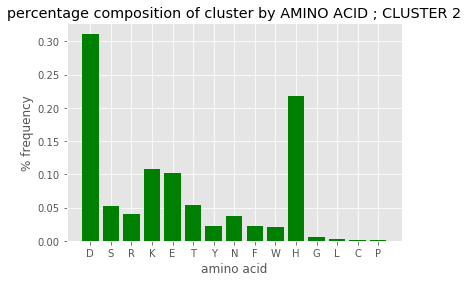

In [170]:
x_axis = []
y_axis = []
for key in counts_all[1]:
    x_axis.append(key)
    y_axis.append(float(counts_all[1][key])/float(len2))
####plot
plt.style.use('ggplot')
##
x_pos = [i for i, _ in enumerate(x_axis)]
##
plt.bar(x_pos, y_axis, color='green')
plt.xlabel("amino acid")
plt.ylabel("% frequency")
plt.title("percentage composition of cluster by AMINO ACID ; CLUSTER 2")
plt.xticks(x_pos, x_axis)
##
plt.show()

#### This is the relative percentage of each amino acid in CLUSTER 2.

### <font color='purple'>It appears that most frequent amino acids are Aspartic Acid, Histidine, Lysine, and Glutamic Acid in CLUSTER 2</font>



## <font color='blue'>Cluster one appears to have a much stronger representation of HYDROPHOBIC residues. This appears to be primarily driven by an overabundance of Alanine and Glycine residues.</font>

## <font color='darkred'>Cluster two appears to have a much stronger representation of Polar  residues. This appears to be primarily driven by an overabundance of Aspartic Acid, Histidine, and Lysine.</font>

## <font color='darkred'>However, both clusters seemed to have similar levels of charged residues in their active sites (45%,55% respectively). This would indicate that charged residues by this classification scheme are not great at partitioning out clusters. </font>

## <font color='darkgreen'>However it appears that the clustering algorithm was able to separate active sites that have hydrophobic pockets which may bind nonpolar compounds (CLUSTER 1) versus active sites that have Polar residues which may preferentially bind molecules with more charge/ionic compounds. </font>

## <font color='darkblue'>So this clustering appears to have had some biological relevance! </font>
